# **Phoneme Analysis** - Time Series, DFT, Spectrogram Representations

## Import Required Libraries

In [1]:
import os
import numpy as np
from scipy import signal
from scipy.io import wavfile
from scipy.fft import fft, ifft
import matplotlib.pyplot as plt

## Set path for Phoneme Data

In [2]:
cwd = os.getcwd()
dataset_path = cwd + '\Phoneme Data'

## Listing the Available Phoneme

In [3]:
# Get all phoneme file names(saved by phoneme name)
audio_files = os.listdir(dataset_path)
# Create a list specifying all available phonemes in the dataset
phoneme_list = [x.split('.')[0] for x in audio_files]

In [4]:
print(phoneme_list)

['AA', 'AE', 'AH', 'AO', 'AW', 'AX', 'AXR', 'AY', 'EH', 'ER', 'EY', 'IH', 'IX', 'IY', 'OW', 'OY', 'UH', 'UW']


## Analysis for Single Phoneme

In [17]:
current_phoneme = 'AA'
phoneme_file_path = dataset_path + '/' + current_phoneme + '.wav'

In [18]:
fs, samples = wavfile.read(phoneme_file_path)

#### Time Series Representation

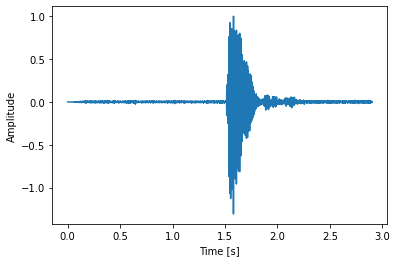

In [19]:
length = samples.shape[0] / fs
time = np.linspace(0., length, samples.shape[0])
plt.plot(time, samples/(max(samples)))
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

#### Spectrogram

C:\Users\Kanishk\AppData\Local\Temp\ipykernel_24416\2957920207.py:2: RuntimeWarning: divide by zero encountered in log
  plt.pcolormesh(time, frequencies, np.log(spectrogram))


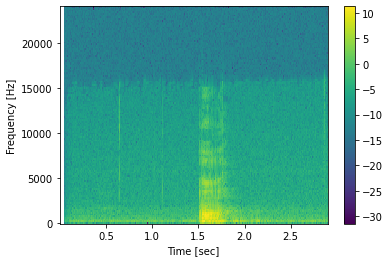

In [20]:
frequencies, time, spectrogram = signal.spectrogram(samples, fs)
plt.pcolormesh(time, frequencies, np.log(spectrogram))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar()
plt.show()

#### DFT Maginitude Spectrum

In [21]:
#Compute DFT of the phoneme sample
signalf = fft(samples)

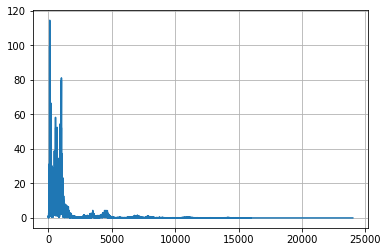

In [22]:
N = samples.shape[0]
# sample spacing
T = 1/fs
x = np.linspace(0.0, N*T, N, endpoint=False)
xf = np.fft.fftfreq(N, T)[:N//2]

plt.plot(xf, 2.0/N * np.abs(signalf[0:N//2]))
plt.grid()
plt.show()